In [167]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import zscore,boxcox
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

# Importing the dataset

In [58]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")

In [59]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [60]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [61]:
df.columns


Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [63]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

# Univariant, Bivariant, Multivariant Anaalysis

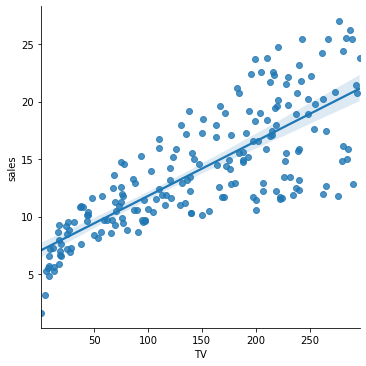

In [64]:
sns.lmplot(x="TV",y="sales",data=df)

Above plot shows that TV variables and sales are postively corelated to each other.

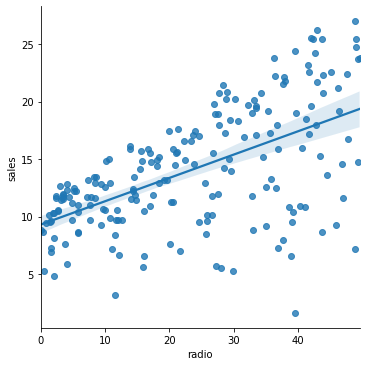

In [65]:
sns.lmplot(x="radio",y="sales",data=df)

Radio and sales are positively corelated to each other.

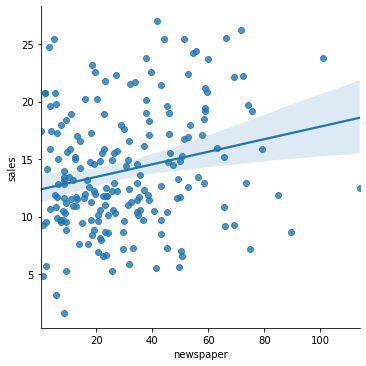

In [66]:
sns.lmplot(x="newspaper",y="sales",data=df)

Newspaper ans sales are also positively correlated but the degree is less as compared to radio and TV.

<AxesSubplot:xlabel='TV', ylabel='Density'>

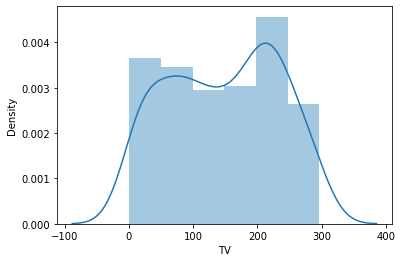

In [67]:
sns.distplot(df["TV"])

We can see that the data in TV is not skewed.

<AxesSubplot:xlabel='radio', ylabel='Density'>

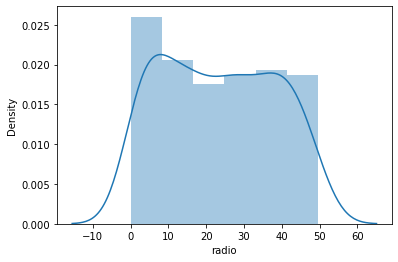

In [68]:
sns.distplot(df["radio"])

We can see that data in radio is also skewed.

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

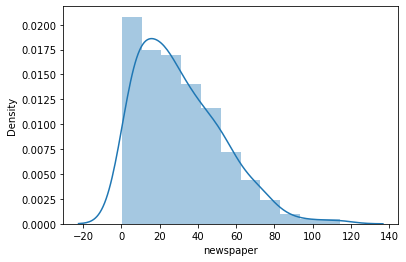

In [69]:
sns.distplot(df["newspaper"])

Here we can observe that the data is skewed which shows the presence of outliers.

<AxesSubplot:xlabel='sales', ylabel='Density'>

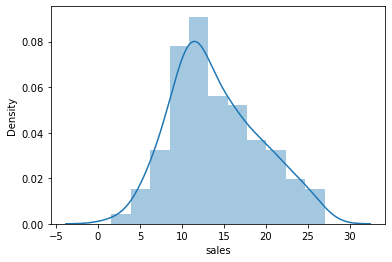

In [70]:
sns.distplot(df["sales"])

The above plot shows the data is not skewed and no sign of outliers.

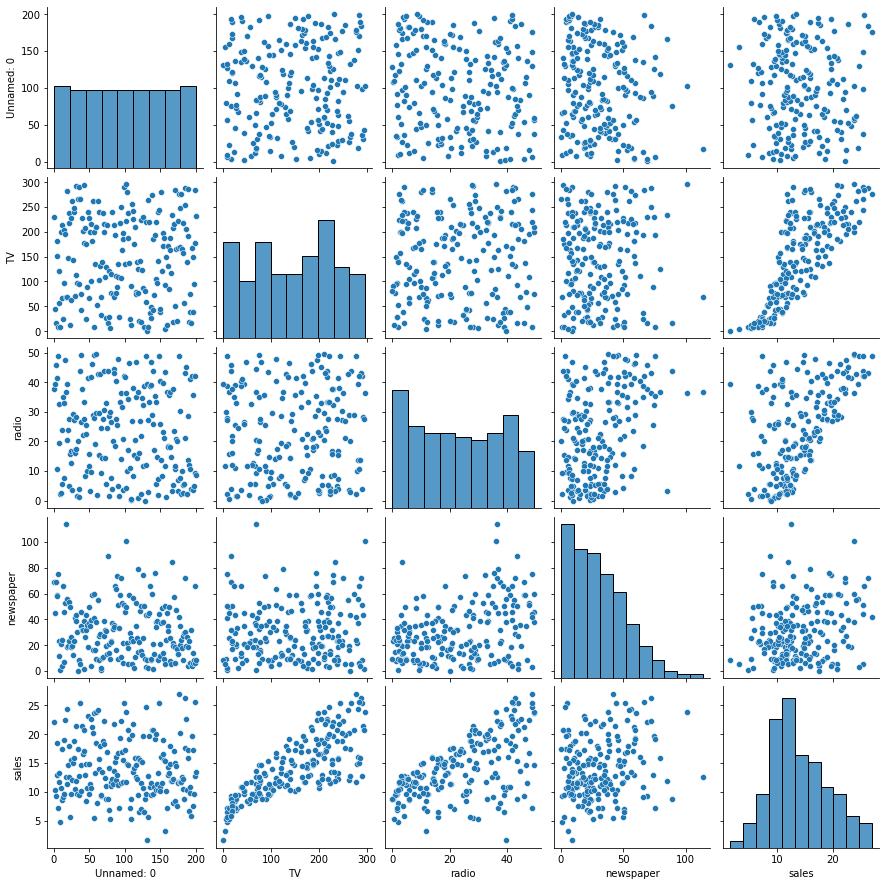

In [71]:
sns.pairplot(df)

The above pairplot depicts the relation of each variable with the other how the viarbles are related to each other.
sales with TV, radio and newspaper shows linear relationship.

Unnamed: 0       AxesSubplot(0.125,0.536818;0.110714x0.343182)
TV            AxesSubplot(0.257857,0.536818;0.110714x0.343182)
radio         AxesSubplot(0.390714,0.536818;0.110714x0.343182)
newspaper     AxesSubplot(0.523571,0.536818;0.110714x0.343182)
sales         AxesSubplot(0.656429,0.536818;0.110714x0.343182)
dtype: object

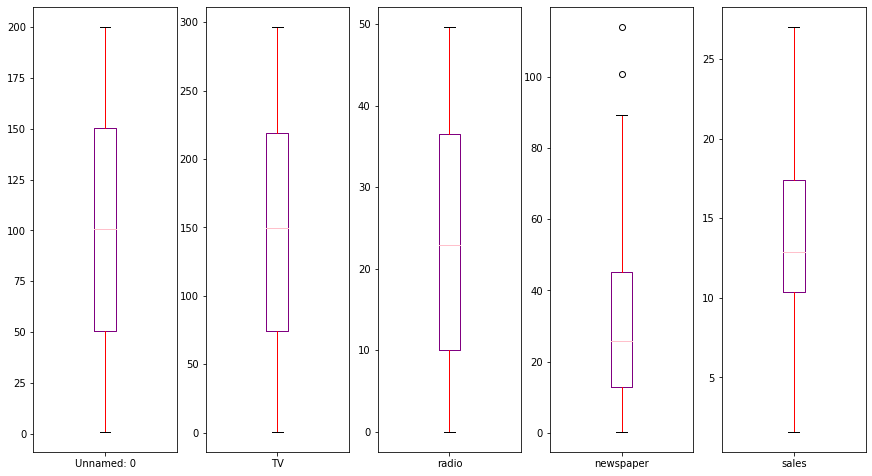

In [72]:
color=dict(boxes="Purple",whiskers="Red",medians="Pink",caps="Black")
df.plot(kind="box",subplots=True,layout=(2,6),figsize=(18,18),color=color)

This is to check the presence of outliers in the various variables we can observe that in newspaper column the outliers are present.

<AxesSubplot:>

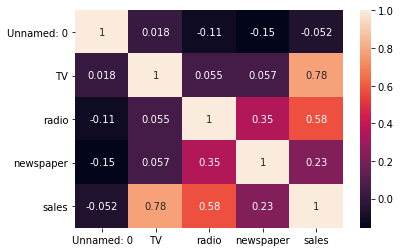

In [73]:
sns.heatmap(df.corr(),annot=True)

From the above heatmap we can say that:
radio and newspaper are positively corelated to each other.
TV is contributing the most in predicting the sales on the other hand newspaper is giving its least contribution.


# Data Cleaning

In [131]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


From above we can see that: 
mean is almost equivalent to 50% chances of data being skewed is less
no major difference between 75% and max values so chances of outliers are very rare.


In [74]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

There is skewness in newspaper column.

# Removing outliers

In [75]:
z=np.abs(zscore(df))    #removing outliers
threshold=3
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([3, 3], dtype=int64))


In [76]:
df_new=df[(z<3).all(axis=1)]
df_new

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


No. of rows reduced to 198.

In [77]:
df_new.skew()

Unnamed: 0   -0.006283
TV           -0.082332
radio         0.114842
newspaper     0.650112
sales         0.407130
dtype: float64

Skewness falls in the range +/-0.65

# Feature engineering

In [80]:
df_new.drop('Unnamed: 0',axis=1,inplace=True) # droping as its contributing least

In [81]:
df_new

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


Not perfroming VIF as there are only 3 columns and doesnt want to reduce any furthur column. 

# Dividing the variables in X and Y

In [83]:
x=df_new.iloc[:,0:3]
x                          #x id for independent variable.

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [133]:
y=df_new.iloc[:,-1]
y                 # y is for independent variable.

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 198, dtype: float64

# Standard Scaling

In [92]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x


array([[ 0.97869734,  0.98952135,  1.93299778],
       [-1.19901165,  1.09070498,  0.75131275],
       [-1.51933199,  1.53591293,  1.93790103],
       [ 0.05645636,  1.22561648,  1.40834924],
       [ 0.40024339, -0.83178391,  1.40344598],
       [-1.61906543,  1.73828018,  2.2173867 ],
       [-1.04647815,  0.6522426 , -0.30779084],
       [-0.31079737, -0.23817331, -0.89127846],
       [-1.62023876, -1.41864895, -1.41102374],
       [ 0.62317696, -1.38492107, -0.42056576],
       [-0.94557138, -1.16906267, -0.27346804],
       [ 0.79800381,  0.05863199, -1.26392602],
       [-1.44189191,  0.80739083,  1.77119028],
       [-0.57714432, -1.04764232, -1.10702179],
       [ 0.67363035,  0.65898817,  0.79544207],
       [ 0.57155024,  1.65733328,  1.13376683],
       [ 1.58061798,  1.1109417 ,  1.27596129],
       [-0.90919801, -0.17746313, -0.56276022],
       [ 0.0071763 ,  0.05188642, -0.52353416],
       [ 0.84141719,  0.30821827,  1.15828311],
       [ 1.06435076, -1.21628169, -0.307

Performed the standard scaling of the x variable so as bring all the variables on the same scale.

In [93]:
x.shape

(198, 3)

# Performing Algorithms

In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=50)  

# 1.Linear Regression

In [166]:
lr=LinearRegression()
lr.fit(x_train,y_train)
sw1=lr.score(x_train,y_train)
print("Coffecient is: ",lr.coef_)
print("Intercept is: ",lr.intercept_)
pred=lr.predict(x_test)
print("Mean Squared Error is:",round(mean_squared_error(y_test,pred),2))
print("Mean Absolute Error is:",round(mean_absolute_error(y_test,pred),2))
print("R2 Score is:",round(r2_score(y_test,pred),2))

Coffecient is:  [ 3.90430948e+00  2.68549388e+00 -2.28219158e-03]
Intercept is:  13.968278598648185
Mean Squared Error is: 2.44
Mean Absolute Error is: 1.24
R2 Score is: 0.92


# 2.Ridge Regression

In [142]:
lt1=Ridge(alpha=0.001) #choosing the best alpha
lt1.fit(x_train,y_train)
sw1=lt1.score(x_train,y_train)
print("Coffecient is: ",lt1.coef_)
print("Intercept is: ",lt1.intercept_)
pred=lt1.predict(x_test)
print("Mean Squared Error is:",round(mean_squared_error(y_test,pred),2))
print("Mean Absolute Error is:",round(mean_absolute_error(y_test,pred),2))
print("R2 Score is:",round(r2_score(y_test,pred),2))

Coffecient is:  [ 3.90428186e+00  2.68547280e+00 -2.27601849e-03]
Intercept is:  13.96827952500654
Mean Squared Error is: 2.44
Mean Absolute Error is: 1.24
R2 Score is: 0.92


# 3.Support Vector Regressor

In [188]:
svr1=SVR(kernel="linear")
svr1.fit(x_train,y_train)
sw2=svr1.score(x_train,y_train)
print("Coffecient is: ",svr1.coef_)
print("Intercept is: ",svr1.intercept_)
pred=svr1.predict(x_test)
print("Mean Squared Error is:",round(mean_squared_error(y_test,pred),2))
print("Mean Absolute Error is:",round(mean_absolute_error(y_test,pred),2))
print("R2 Score is:",round(r2_score(y_test,pred),2))

Coffecient is:  [[ 3.38945664  2.98273308 -0.01751455]]
Intercept is:  [14.45552725]
Mean Squared Error is: 2.81
Mean Absolute Error is: 1.24
R2 Score is: 0.9


# 4.Lasso Regression

In [157]:
ls1=Lasso(alpha=0.001)   #choosing the best alpha
ls1.fit(x_train,y_train)
sw=ls1.score(x_train,y_train)
print("Coffecient is: ",ls1.coef_)
print("Intercept is: ",ls1.intercept_)
pred=ls1.predict(x_test)
print("Mean Squared Error is:",round(mean_squared_error(y_test,pred),2))
print("Mean Absolute Error is:",round(mean_absolute_error(y_test,pred),2))
print("R2 Score is:",round(r2_score(y_test,pred),2))
print(np.sqrt(mean_squared_error(y_test,pred)))

Coffecient is:  [ 3.90341439e+00  2.68396893e+00 -8.75087648e-04]
Intercept is:  13.968266979906764
Mean Squared Error is: 2.44
Mean Absolute Error is: 1.24
R2 Score is: 0.92
1.5634263873960494


# 5.Decision Tree Classifier

In [180]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
sw=dtr.score(x_train,y_train)
pred=dtr.predict(x_test)
print("Mean Squared Error is:",round(mean_squared_error(y_test,pred),2))
print("Mean Absolute Error is:",round(mean_absolute_error(y_test,pred),2))
print("R2 Score is:",round(r2_score(y_test,pred),2))
print(np.sqrt(mean_squared_error(y_test,pred)))


Mean Squared Error is: 1.72
Mean Absolute Error is: 1.07
R2 Score is: 0.94
1.3098982148752374


# Cross Validation Score

In [184]:
print(cross_val_score(ls1,x,y,cv=5).mean())  #lasso

0.885390949618731


In [185]:
print(cross_val_score(lt1,x,y,cv=5).mean())   #Ridge

0.885360701413292


In [186]:
print(cross_val_score(svr1,x,y,cv=5).mean())  #SVC

0.8759677907869422


In [187]:
print(cross_val_score(lr,x,y,cv=5).mean())    #Linear Regression

0.885360575668391


In [182]:
print(cross_val_score(dtr,x,y,cv=5).mean())    #DTR

0.9589331101325872


model           accuracy score       cv
linear                 92            88
lasso                  92            88
ridge                  92            88
svr                    91            87
dtr                    95            96

As the difference between all the models are same.....Selecting Linear Regression as the best performing model.





# Hyper Parameter Tunning

In [189]:
parameter={"fit_intercept":[True,False],
          "normalize":[True,False],
          "copy_X":[True,False],
          "n_jobs":np.arange(2,20),
          "positive":[True,False]}

In [190]:
gcv=GridSearchCV(LinearRegression(),parameter,cv=5)

In [192]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'normalize': [True, False],
                         'positive': [True, False]})

In [193]:
gcv.best_params_  #best parameters

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': 2,
 'normalize': True,
 'positive': True}

# Final Model

In [200]:
lr=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=2,normalize=True,positive=True)
lr.fit(x_train,y_train)
sw1=lr.score(x_train,y_train)
print("Coffecient is: ",lr.coef_)
print("Intercept is: ",lr.intercept_)
pred=lt1.predict(x_test)
print("Mean Squared Error is:",round(mean_squared_error(y_test,pred),2))
print("Mean Absolute Error is:",round(mean_absolute_error(y_test,pred),2))
print("R2 Score is:",round(r2_score(y_test,pred),2))

Coffecient is:  [3.90442015 2.68465196 0.        ]
Intercept is:  13.968191149838864
Mean Squared Error is: 2.44
Mean Absolute Error is: 1.24
R2 Score is: 0.92


# Saving the model

In [201]:
import joblib
joblib.dump(lr,"finalmod9.pkl")

['finalmod9.pkl']